![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [97]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


## Exploring the DataSet

In [98]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904
std,5.452462,1.960275,14.035971,806.361278
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.700000,17.300000,197.000000,4025.000000
75%,48.625000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,6300.000000


In [99]:
penguins_df.isna().sum().sort_values()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [100]:
penguins_df["sex"].value_counts()

MALE      167
FEMALE    165
Name: sex, dtype: int64

In [101]:
# Importing matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1]:
# Defining the function for plotting
def plot_distribution(column, df):
    """
    Plots the KDE of a given numerical column
    """
    try:
        # Check if the column exists in the DataFrame
        if column not in df.columns:
            print(f"Column '{column}' does not exist in the DataFrame. Skipping.")
            return
        
        # Check if the column is numerical
        if df[column].dtype in ['int64', 'float64']:
            # Plot the kernel density estimate
            df[column].plot(kind="kde")
            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Density')
            plt.grid(True)
            plt.show()
        else:
            print(f"Column '{column}' is not numerical. Skipping.")
    
    except Exception as e:
        print(f"Error processing column '{column}': {e}")

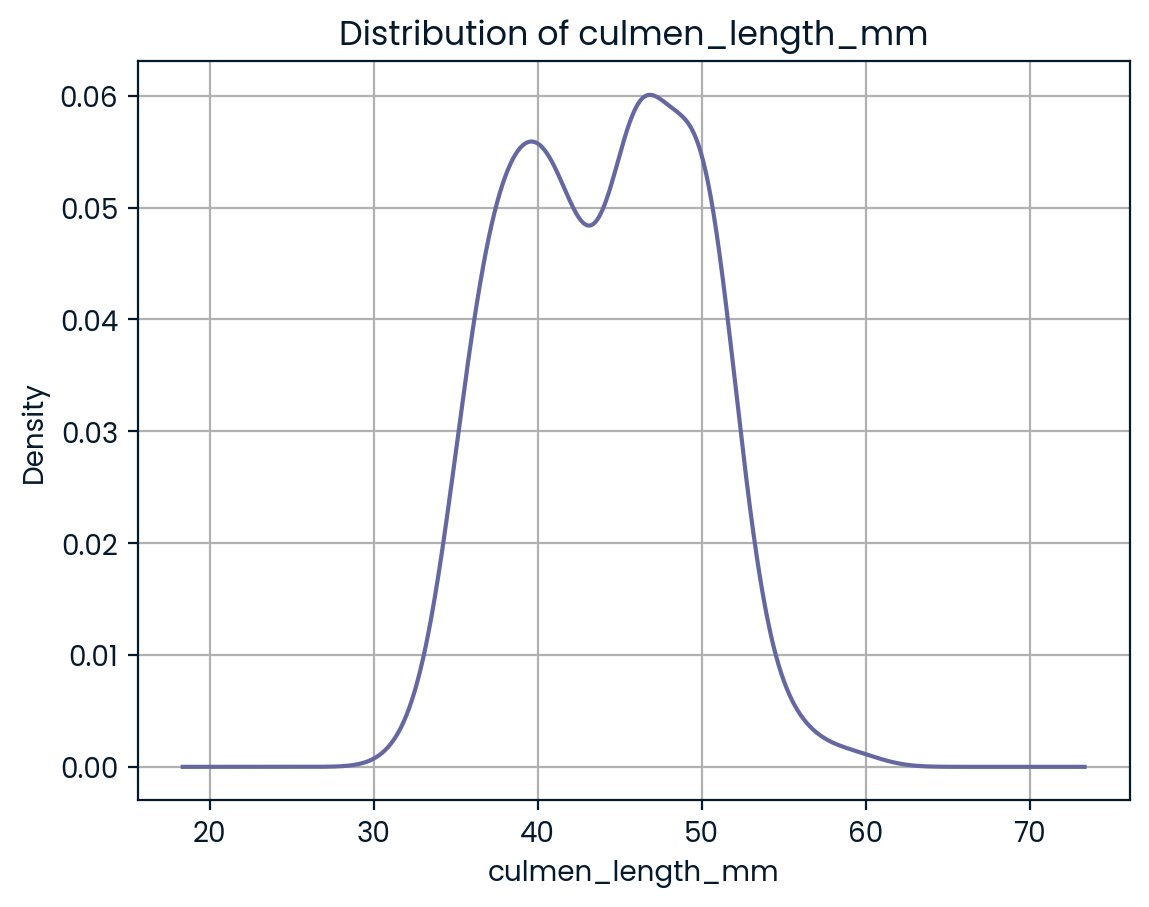

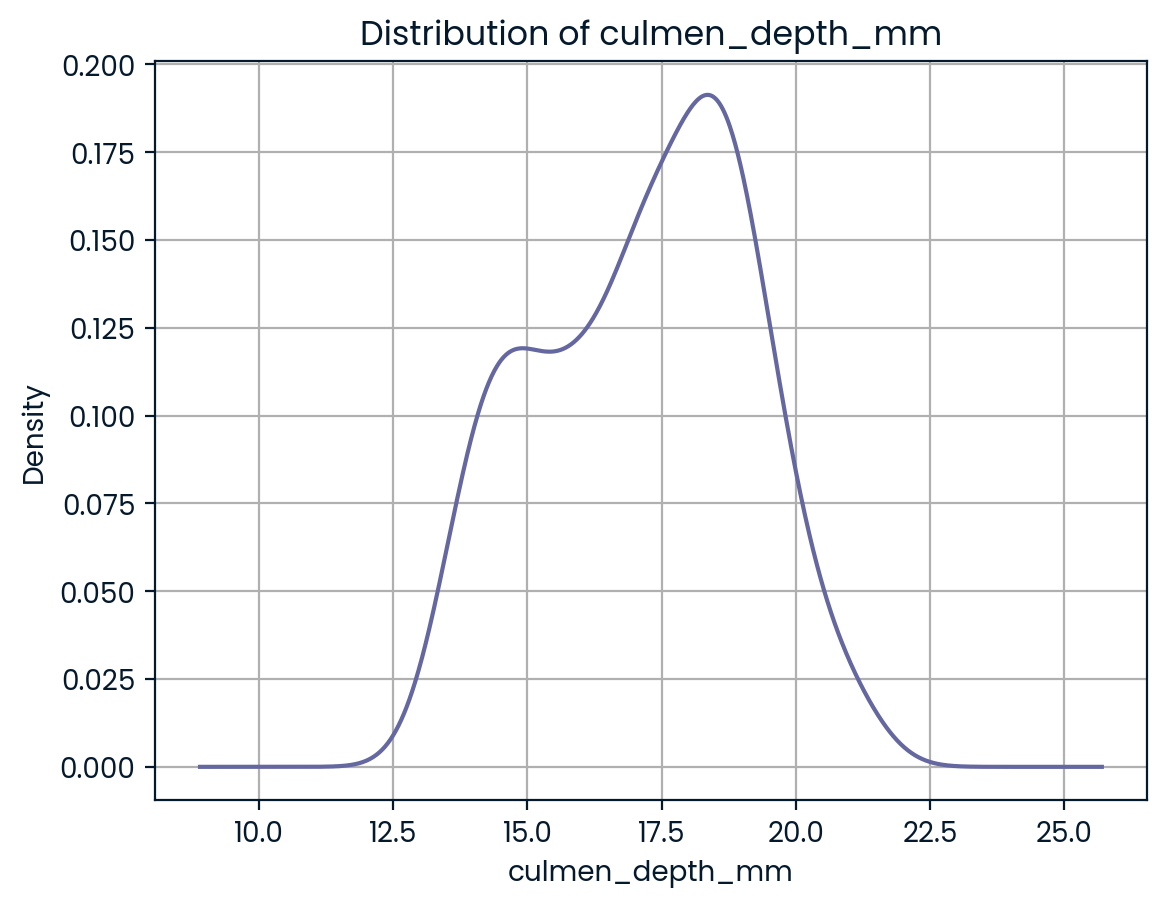

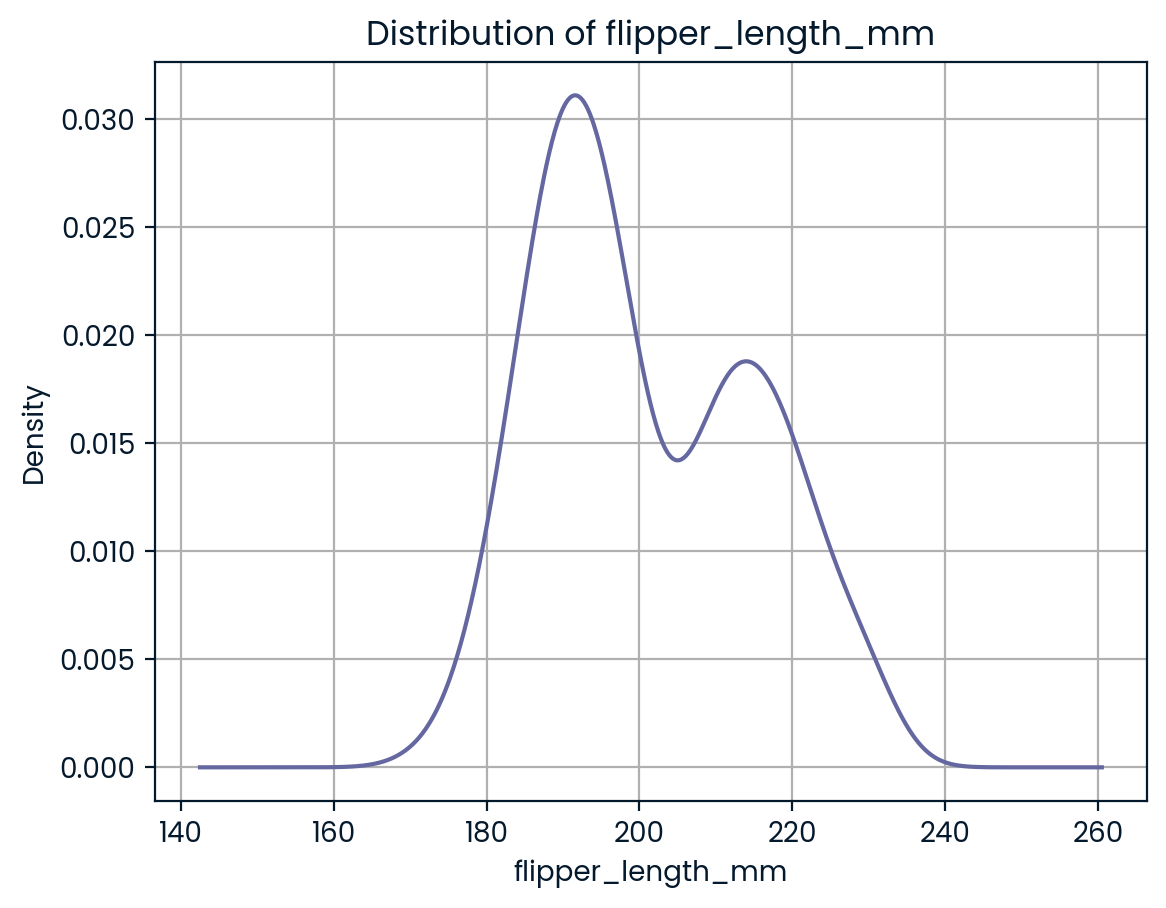

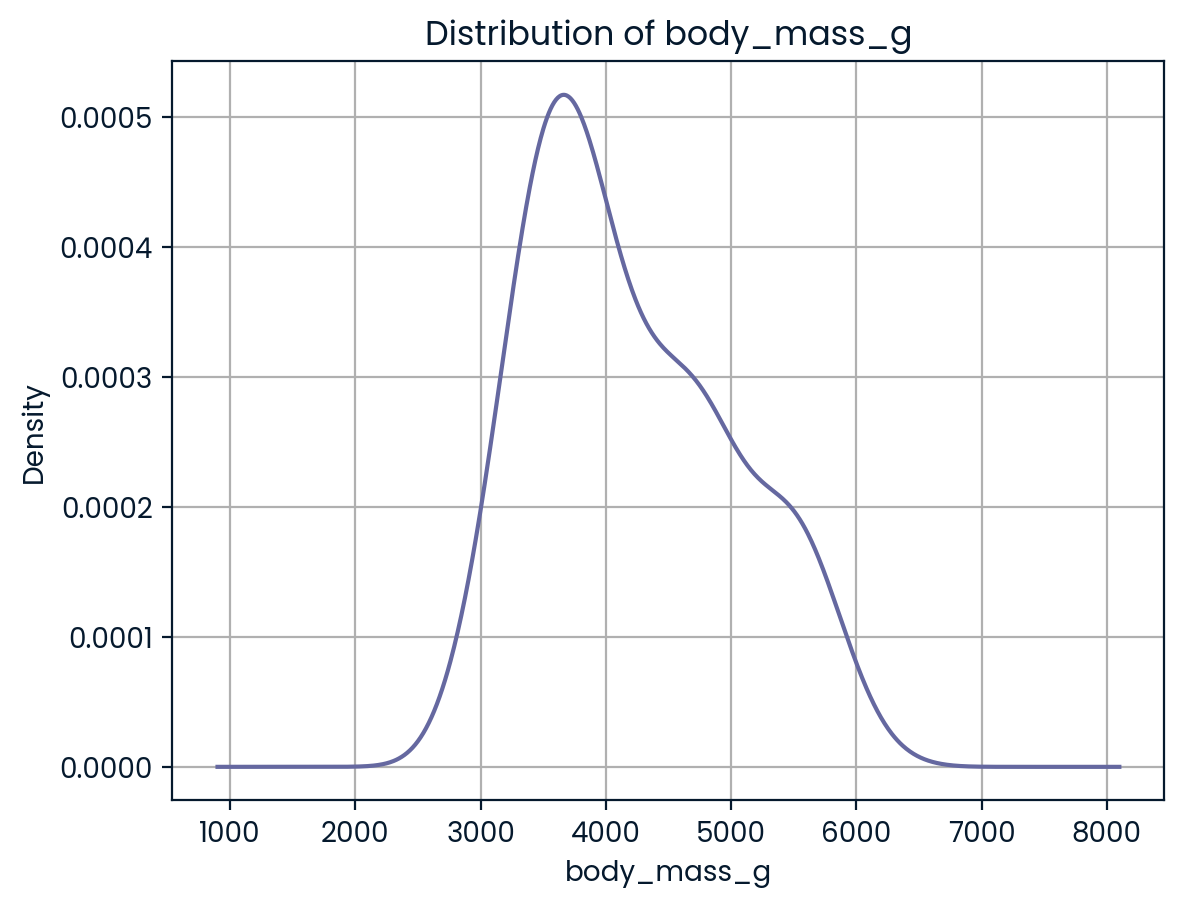

Column 'sex' is not numerical. Skipping.


In [103]:
for column in penguins_df.columns:
    plot_distribution(column, penguins_df)

In [104]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats.distributions import norm

# Checking the qqplots
def quartile_checks(column, df):
    """
    Plots the KDE of a given numerical column
    """
    try:
        # Check if the column exists in the DataFrame
        if column not in df.columns:
            print(f"Column '{column}' does not exist in the DataFrame. Skipping.")
            return
# Check if the column is numerical
        if df[column].dtype in ['int64', 'float64']:
            # Plot the kernel density estimate
            qqplot(df[column],line='s',dist=norm)
            plt.title(f'QQ plot of {column}')
            plt.grid(True)
            plt.show()
        else:
            print(f"Column '{column}' is not numerical. Skipping.")
    
    except Exception as e:
        print(f"Error processing column '{column}': {e}")        

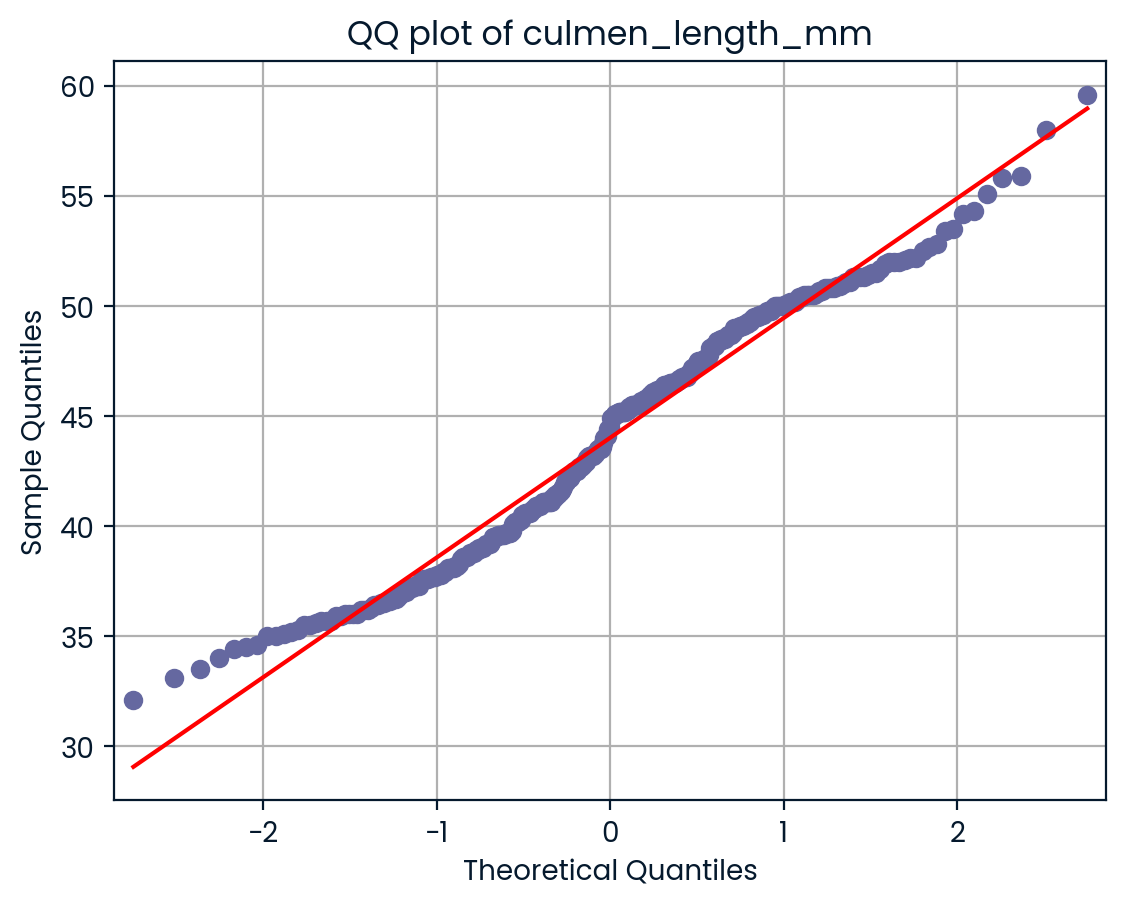

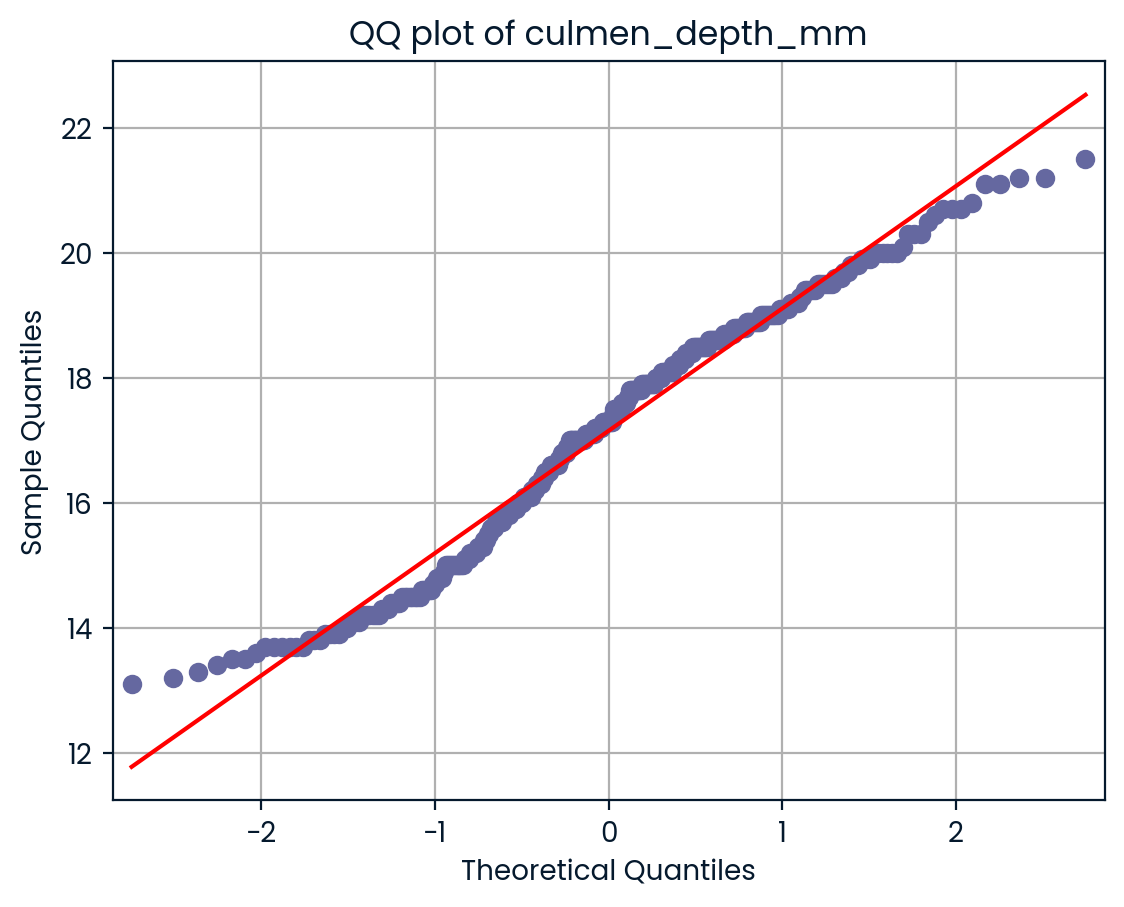

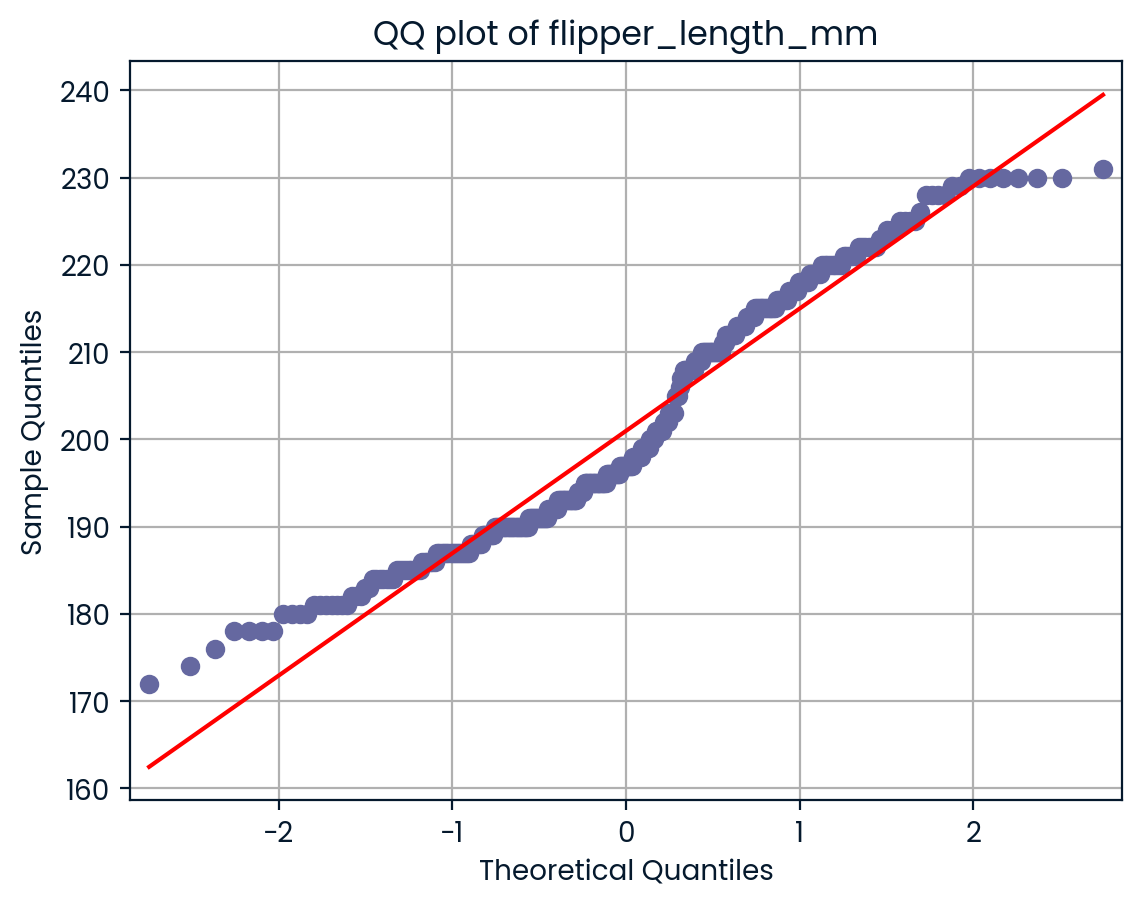

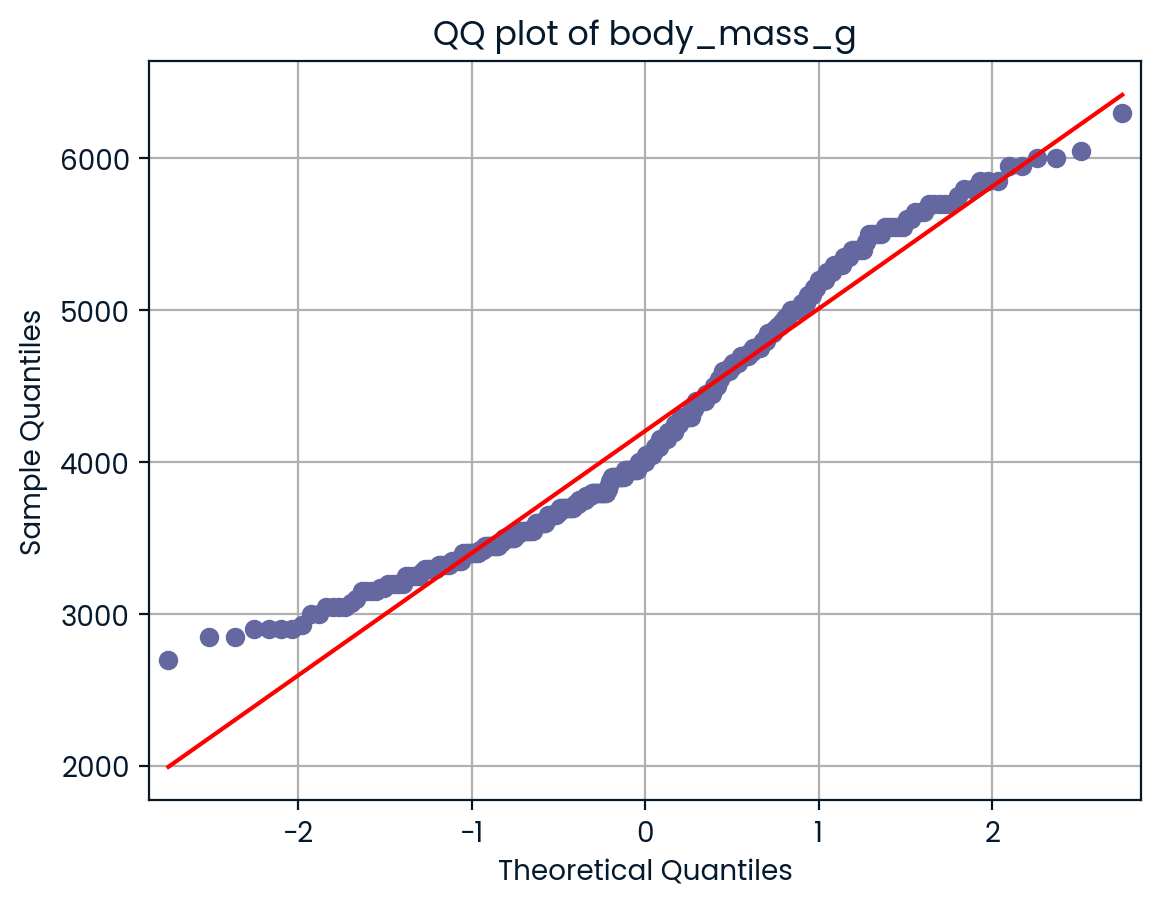

Column 'sex' is not numerical. Skipping.


In [105]:
for column in penguins_df.columns:
    quartile_checks(column, penguins_df)

The numerical columns are roughly normally distributed. I will be using StandardScaler to standardize the variances.

## Visualizing the outliers

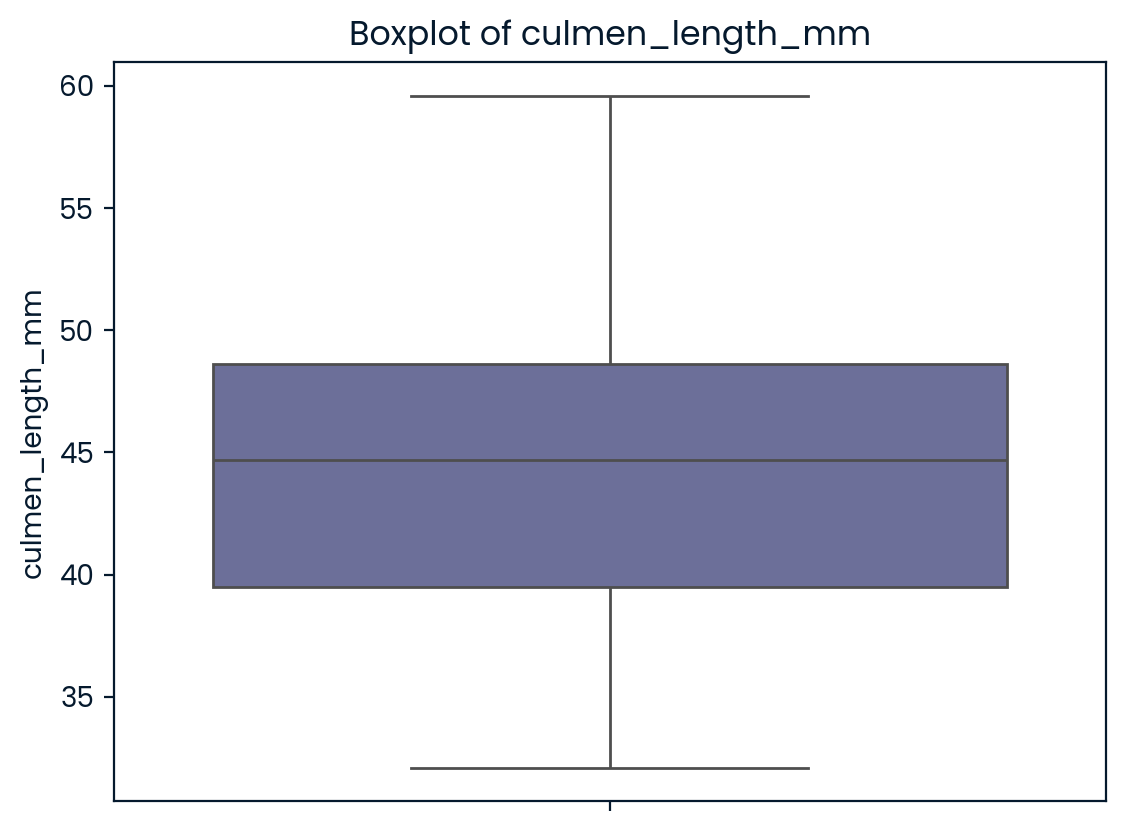

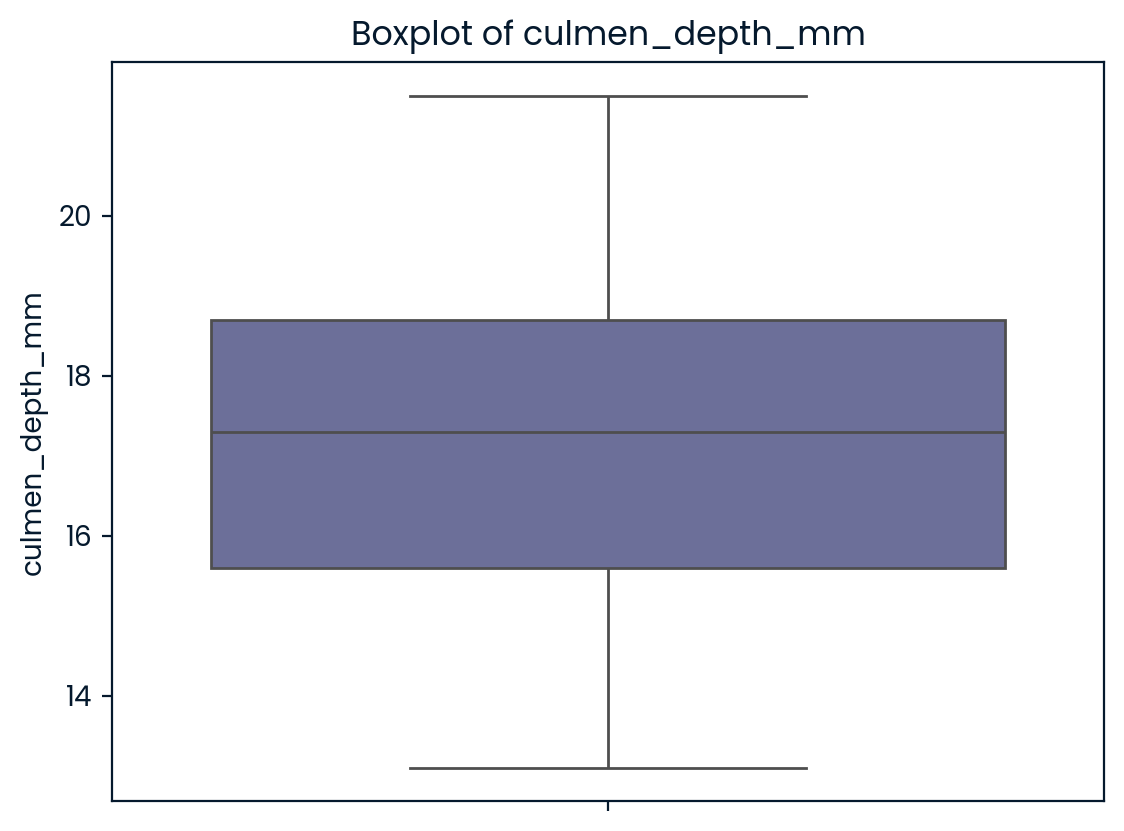

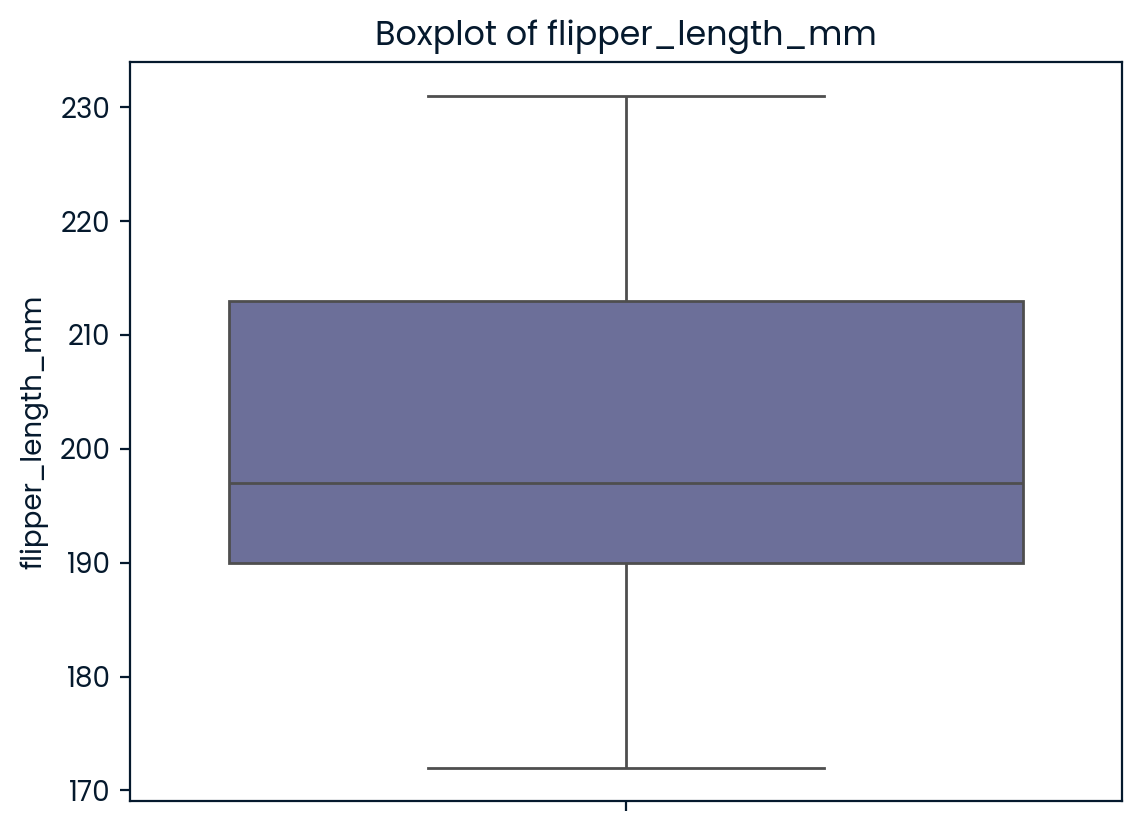

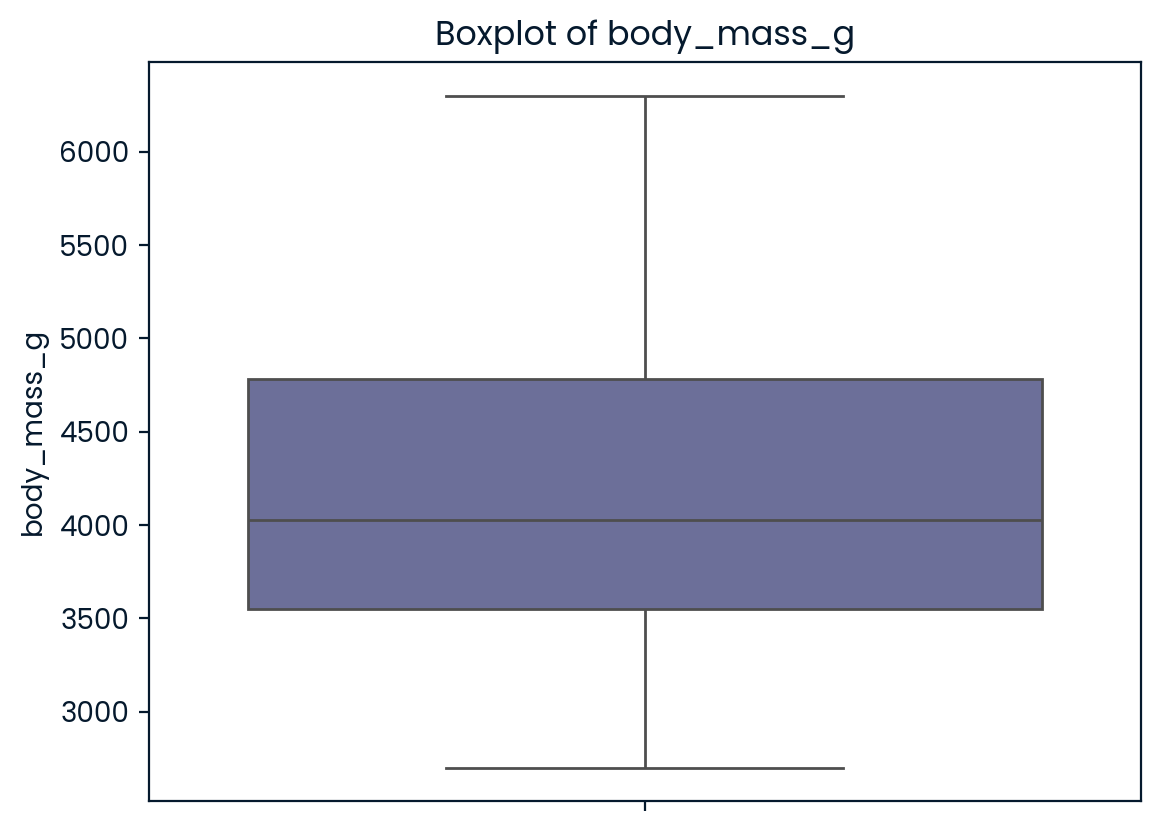

In [106]:
# Using a Box plot

for column in ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g']:
    sns.boxplot(y=column, data=penguins_df)
    plt.title(f'Boxplot of {column}')
    plt.show()

In [107]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


## One-hot encoding the categorical Data

In [108]:
# Getting the dummy variables
penguins_dummies = pd.get_dummies(penguins_df, drop_first=True)
penguins_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex_MALE           332 non-null    uint8  
dtypes: float64(4), uint8(1)
memory usage: 10.8 KB


## Standardizing the variables

In [109]:
data = penguins_dummies.values
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

## Performing Elbow Analysis to discern n_clusters

In [110]:
ks = range(1, 8) #List of possible number of clusters
inertias = []

for k in ks:
    data_sample = np.copy(data_scaled)
    model = KMeans(n_clusters=k, random_state=24)
    model.fit(data_sample)
    inertias.append(model.inertia_)

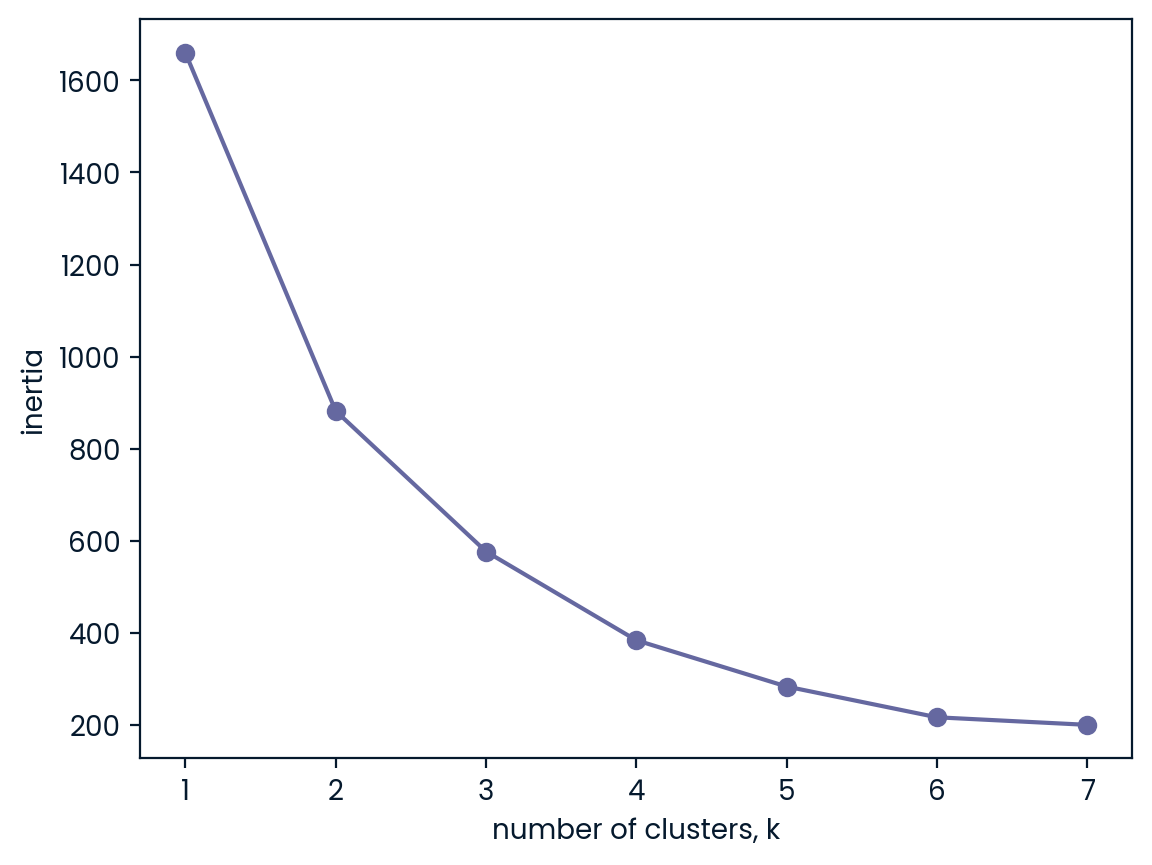

In [111]:
# Plotting ks vs inertia
plt.plot(ks, inertias, "-o")
plt.xlabel("number of clusters, k")
plt.ylabel("inertia")
plt.xticks(ks)
plt.show()

I will be using 4 clusters in my analysis

## KMeans Clustering

In [112]:
kmeans = KMeans(n_clusters=4, random_state=24)
kmeans.fit(data_scaled)
labels = kmeans.labels_
labels

array([1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3,
       3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 1, 3, 3, 1, 3, 1, 1, 3, 1, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3,
       1, 3, 1, 3, 1, 1, 3, 1, 3, 3, 1, 3, 1, 1, 3, 2, 0, 2, 0, 0, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0,
       0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,

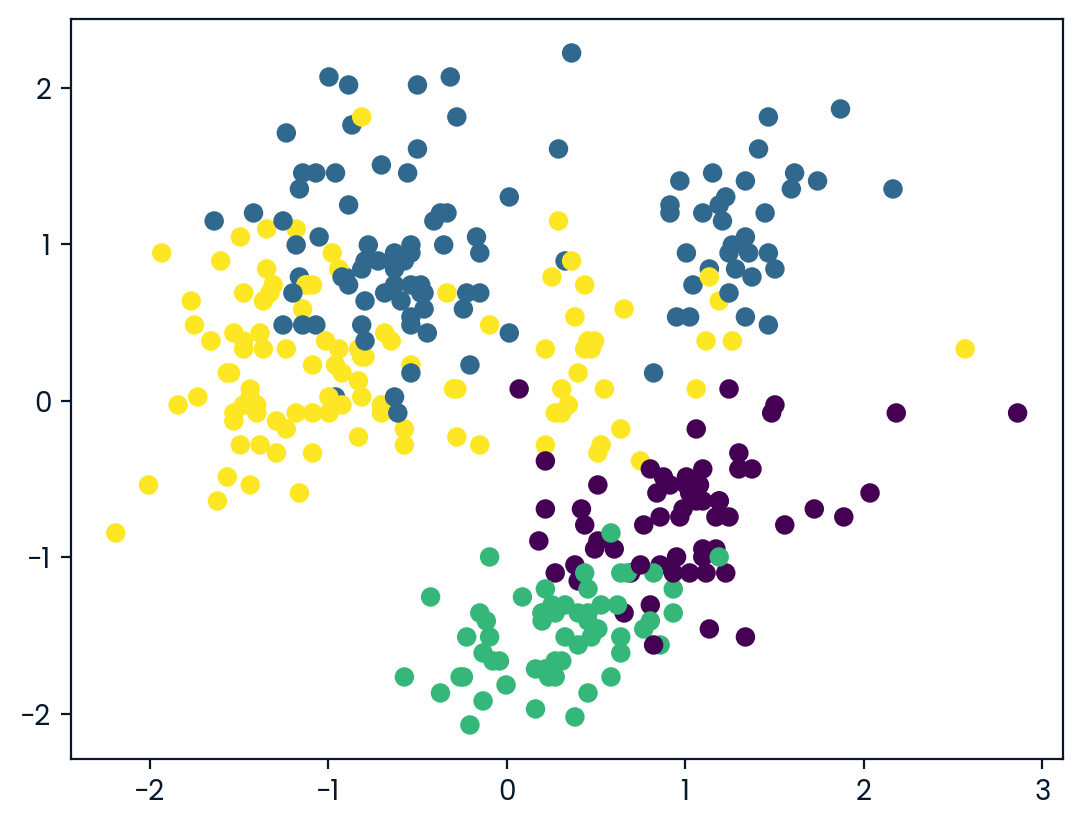

In [113]:
## Visualizing the labels
plt.scatter(c=kmeans.labels_, x=data_scaled[:, 0], y=data_scaled[:, 1])
plt.show()

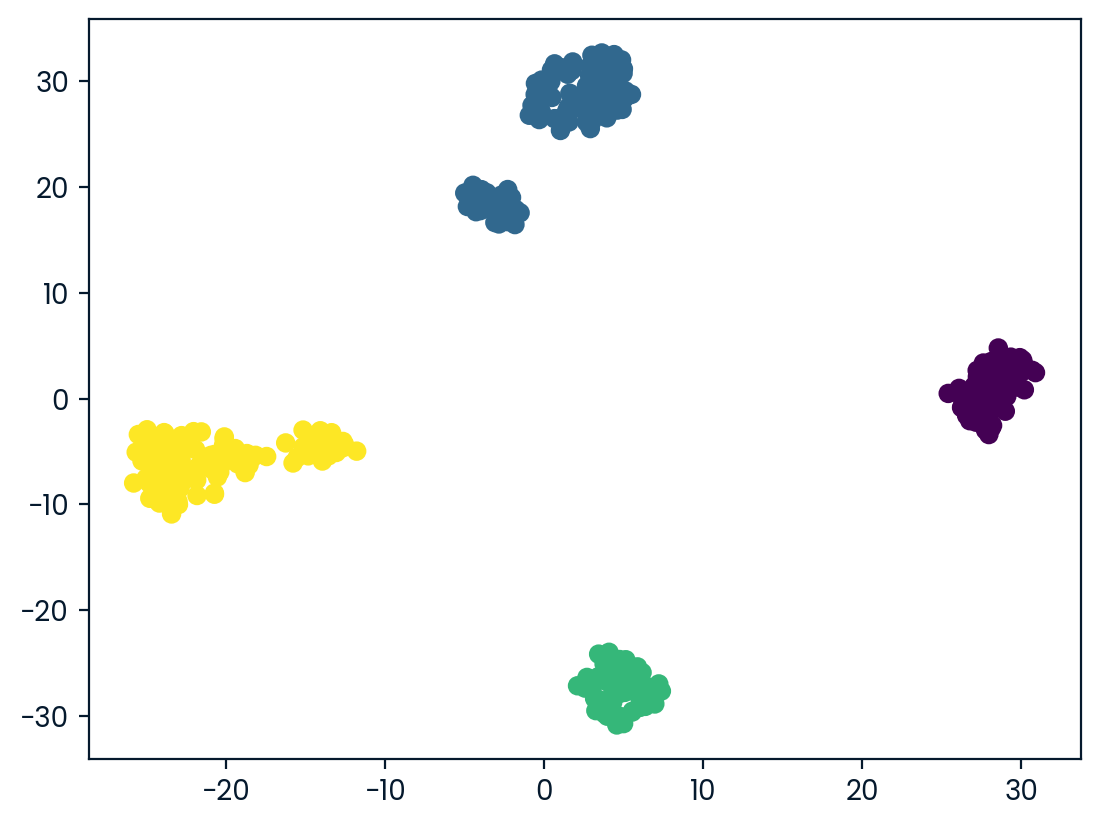

In [114]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)
transformed = model.fit_transform(data_sample)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=labels)
plt.show()

## Creating Stat_penguins

In [115]:
penguins_df["label"] = kmeans.labels_

stat_penguins = penguins_df.groupby("label").mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,49.473770,15.718033,221.540984,5484.836066
1,43.878302,19.111321,194.764151,4006.603774
2,45.563793,14.237931,212.706897,4679.741379
3,40.217757,17.611215,189.046729,3419.158879
